In [1]:
import os
import io
import re
from sklearn.model_selection import train_test_split
import numpy as np

def import_data():
    ham_list = []
    spam_list = []

    for filename in os.listdir("./data/email/ham/"):
        f = open("./data/email/ham/" + filename, mode="r", encoding="latin-1")
        ham_list.append(f.read())

    for filename in os.listdir("./data/email/spam/"):
        f = open("./data/email/spam/" + filename, mode="r", encoding="latin-1")
        spam_list.append(f.read())
    return ham_list, spam_list  

def textParse(bigString):
    listOfTokens = re.split('\W+', bigString)
    regex = re.compile('[0-9]+')  # filter out words with numbers
    return [tok.lower() for tok in listOfTokens if (len(tok) > 2 and not regex.search(tok))]   

def createDataSet(ham_list, spam_list):
    totalPosts = ham_list + spam_list
    classList = [0] * len(ham_list) + [1] * len(spam_list)
#     for index, post in enumerate(totalPosts):
#         totalPosts[index] = textParse(post)
    Xtrain, Xtest, ytrain, ytest = train_test_split(totalPosts, classList,
                                                   random_state=0)
    return Xtrain, Xtest, ytrain, ytest

In [2]:
ham_list, spam_list = import_data()
Xtrain, Xtest, ytrain, ytest = createDataSet(ham_list, spam_list)

In [3]:
# vectorize documents
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [4]:
model.fit(Xtrain, ytrain)
labels = model.predict(Xtest)

Text(89.18, 0.5, 'predicted label')

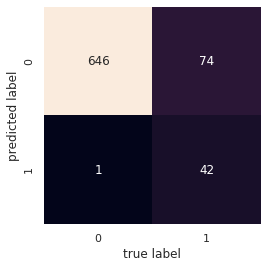

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [6]:
(mat[0,0] + mat[1,1])/len(Xtest)

0.9017038007863696